# Goat Exploration

In this analysis, we are going to preprocess the data by combining two datasets. Each dataset contains valuable information, but both have missing values in different areas. By merging the two, we can leverage the strengths of each dataset, filling in gaps and ensuring we have a more complete and comprehensive set of data for our analysis. This approach allows us to mitigate the impact of missing values and create a more robust dataset that complements well across different time periods and data points.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Read csv files into dataframes

In [2]:
data_folder = "data/"
matches = "atp_2000_17/"
rankings = "atp_rankings/"

atp1 = pd.read_csv(data_folder + matches + "atp_matches_2000.csv")
atp2 = pd.read_csv(data_folder + matches + "atp_matches_2001.csv")
atp3 = pd.read_csv(data_folder + matches + "atp_matches_2002.csv")
atp4 = pd.read_csv(data_folder + matches + "atp_matches_2003.csv")
atp5 = pd.read_csv(data_folder + matches + "atp_matches_2004.csv")
atp6 = pd.read_csv(data_folder + matches + "atp_matches_2005.csv")
atp7 = pd.read_csv(data_folder + matches + "atp_matches_2006.csv")
atp8 = pd.read_csv(data_folder + matches + "atp_matches_2007.csv")
atp9 = pd.read_csv(data_folder + matches + "atp_matches_2008.csv")
atp10 = pd.read_csv(data_folder + matches + "atp_matches_2009.csv")
atp11 = pd.read_csv(data_folder + matches + "atp_matches_2010.csv")
atp12 = pd.read_csv(data_folder + matches + "atp_matches_2011.csv")
atp13 = pd.read_csv(data_folder + matches + "atp_matches_2012.csv")
atp14 = pd.read_csv(data_folder + matches + "atp_matches_2013.csv")
atp15 = pd.read_csv(data_folder + matches + "atp_matches_2014.csv")
atp16 = pd.read_csv(data_folder + matches + "atp_matches_2015.csv")
atp17 = pd.read_csv(data_folder + matches + "atp_matches_2016.csv")

atp19 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")
atp20 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")

# filter years for last two
atp19 = atp19[atp19['tourney_id'].str[:4].isin(['2017', '2018', '2019'])]
atp20 = atp20[atp20['tourney_id'].str[:4].isin(['1998', '1999'])]

Combine data into one big dataframe

In [3]:
atp = pd.concat([atp1, atp2, atp3, atp4, atp5, atp6, atp7, atp8, atp9, atp10, atp11, atp12, atp13, atp14, atp15, atp16, atp17, atp19, atp20])

In [4]:
# Extract year from the 'tourney_id' column and create a 'year' column
atp['year'] = atp['tourney_id'].str[:4]
atp = atp.sort_values(by='year')

# Filter the data for the three GOAT candidates
atp_goats = atp[(atp['winner_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"])) |
                (atp['loser_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"]))]

# Convert the 'tourney_date' column to datetime format
atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')

# Optionally, drop any rows with missing values
atp_goats = atp_goats.dropna(subset=['tourney_date'])

/var/folders/xk/r2z0cjlx76x3d1cbccmvznb80000gn/T/ipykernel_15668/2525749873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')


In [5]:
atp_goats.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
114422,1998-314,Gstaad,Clay,32,A,1970-01-01 00:00:00.019980706,2.0,102463,NaN,LL,...,1.0,3.0,74.0,36.0,24.0,15.0,10.0,1.0,5.0,1998
115478,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,14.0,103819,NaN,Q,...,0.0,0.0,65.0,36.0,22.0,11.0,8.0,4.0,8.0,1998
115487,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,23.0,103819,NaN,Q,...,9.0,4.0,75.0,39.0,30.0,16.0,9.0,8.0,10.0,1998
115500,1998-328,Basel,Hard,32,A,1970-01-01 00:00:00.019981005,5.0,101736,4.0,NaN,...,4.0,2.0,53.0,31.0,20.0,7.0,8.0,4.0,8.0,1998
115492,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,28.0,101733,2.0,NaN,...,3.0,6.0,67.0,39.0,27.0,14.0,10.0,7.0,10.0,1998


## Who won the most titles ?

### Who performed best on each surface ?

In [6]:
atp_goats['winner_name'].value_counts()

winner_name
Roger Federer         1230
Rafael Nadal           947
Novak Djokovic         839
Andy Murray             27
Jo Wilfried Tsonga      17
                      ... 
Sjeng Schalken           1
Davide Sanguinetti       1
Felix Mantilla           1
Juan Monaco              1
Lucas Arnold Ker         1
Name: count, Length: 172, dtype: int64

In [7]:
atp_goats.surface.value_counts()

surface
Hard      2073
Clay       953
Grass      392
Carpet      90
Name: count, dtype: int64

In [8]:
atp_clay = atp_goats.loc[atp_goats.surface == 'Clay']
atp_hard = atp_goats.loc[atp_goats.surface == 'Hard']
atp_grass = atp_goats.loc[atp_goats.surface == 'Grass']
atp_carpet = atp_goats.loc[atp_goats.surface == 'Carpet']

In [9]:
# Federer, Nadal, and Djokovic wins on Clay
federer_clay_wins = atp_clay[atp_clay['winner_name'] == 'Roger Federer']
federer_clay_wins_count = federer_clay_wins['tourney_id'].nunique()

rafa_clay_wins = atp_clay[atp_clay['winner_name'] == 'Rafael Nadal']
rafa_clay_wins_count = rafa_clay_wins['tourney_id'].nunique()

djokovic_clay_wins = atp_clay[atp_clay['winner_name'] == 'Novak Djokovic']
djokovic_clay_wins_count = djokovic_clay_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Hard
federer_hard_wins = atp_hard[atp_hard['winner_name'] == 'Roger Federer']
federer_hard_wins_count = federer_hard_wins['tourney_id'].nunique()

rafa_hard_wins = atp_hard[atp_hard['winner_name'] == 'Rafael Nadal']
rafa_hard_wins_count = rafa_hard_wins['tourney_id'].nunique()

djokovic_hard_wins = atp_hard[atp_hard['winner_name'] == 'Novak Djokovic']
djokovic_hard_wins_count = djokovic_hard_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Grass
federer_grass_wins = atp_grass[atp_grass['winner_name'] == 'Roger Federer']
federer_grass_wins_count = federer_grass_wins['tourney_id'].nunique()

rafa_grass_wins = atp_grass[atp_grass['winner_name'] == 'Rafael Nadal']
rafa_grass_wins_count = rafa_grass_wins['tourney_id'].nunique()

djokovic_grass_wins = atp_grass[atp_grass['winner_name'] == 'Novak Djokovic']
djokovic_grass_wins_count = djokovic_grass_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Carpet
federer_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Roger Federer']
federer_carpet_wins_count = federer_carpet_wins['tourney_id'].nunique()

rafa_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Rafael Nadal']
rafa_carpet_wins_count = rafa_carpet_wins['tourney_id'].nunique()

djokovic_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Novak Djokovic']
djokovic_carpet_wins_count = djokovic_carpet_wins['tourney_id'].nunique()

In [10]:
# Data for the plots for each surface
data_clay = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_clay_wins_count, rafa_clay_wins_count, djokovic_clay_wins_count]
}

data_hard = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_hard_wins_count, rafa_hard_wins_count, djokovic_hard_wins_count]
}

data_grass = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_grass_wins_count, rafa_grass_wins_count, djokovic_grass_wins_count]
}

data_carpet = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_carpet_wins_count, rafa_carpet_wins_count, djokovic_carpet_wins_count]
}

# Create DataFrames
df = pd.DataFrame(data_clay)
df_hard = pd.DataFrame(data_hard)
df_grass = pd.DataFrame(data_grass)
df_carpet = pd.DataFrame(data_carpet)

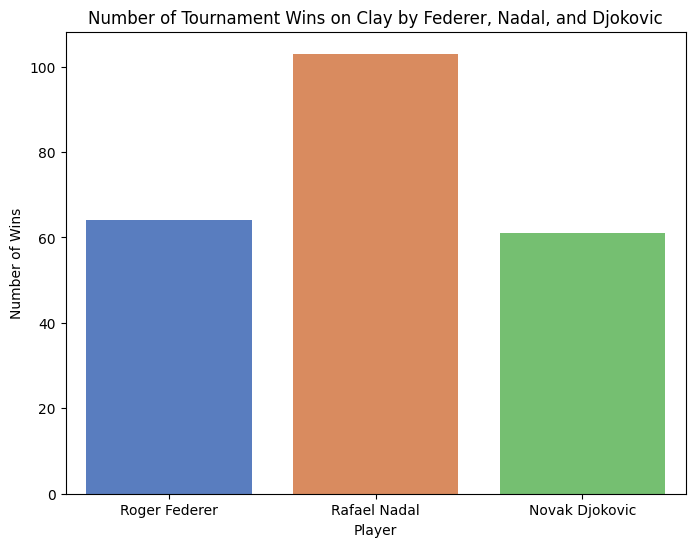

In [11]:
# Create the seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df, hue='Player', palette='muted', legend=False)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Clay by Federer, Nadal, and Djokovic')

# Show the plot
plt.show()

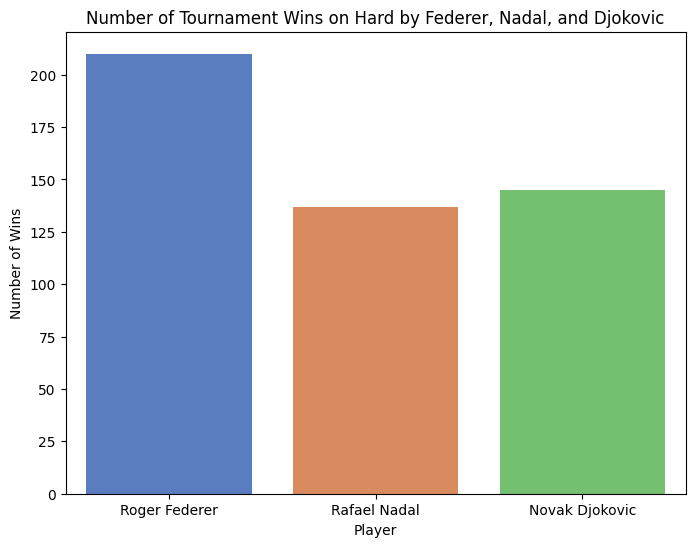

In [12]:
# Plot for Hard
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_hard, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Hard by Federer, Nadal, and Djokovic')
plt.show()

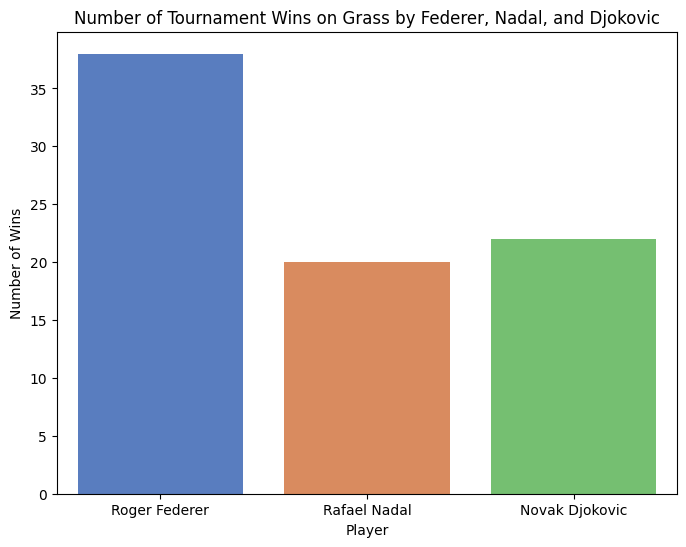

In [13]:
# Plot for Grass
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_grass, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Grass by Federer, Nadal, and Djokovic')
plt.show()

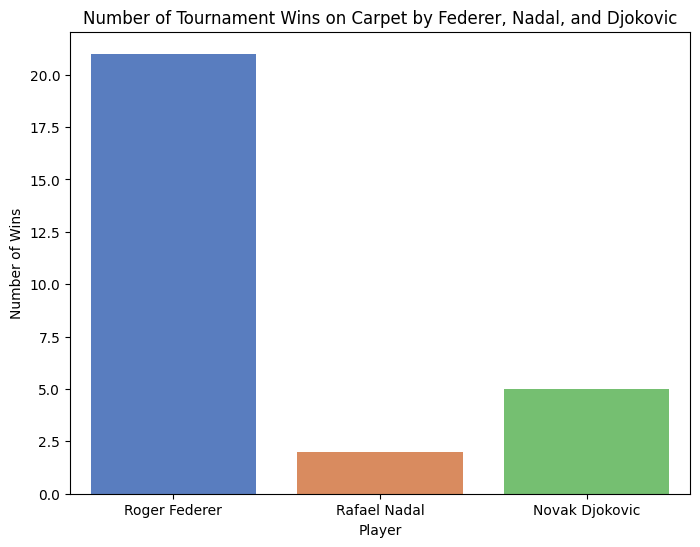

In [14]:
# Plot for Carpet
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_carpet, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Carpet by Federer, Nadal, and Djokovic')
plt.show()

### Who won the most Grand Slams ?

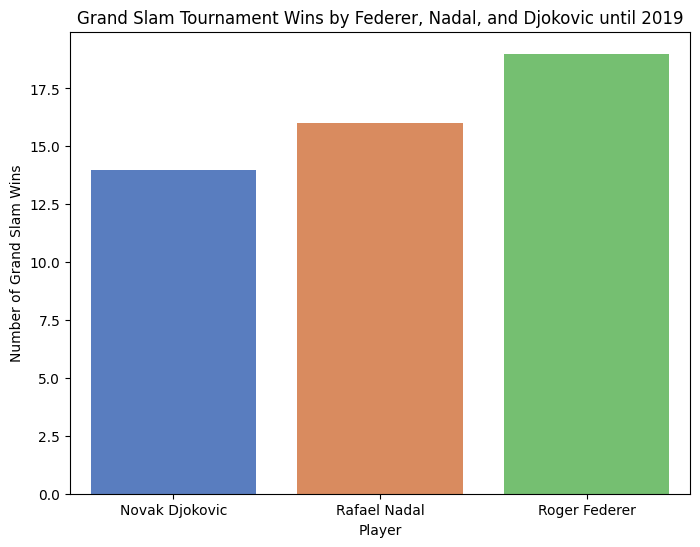

,Player,Grand Slam Wins
0,Novak Djokovic,14
1,Rafael Nadal,16
2,Roger Federer,19


In [15]:
# Filter the dataset for Grand Slam tournaments (tourney_level == "G")
grand_slams = atp_goats[atp_goats['tourney_level'] == 'G']

# Select the relevant columns: tournament name, winner name, year
grand_slams = grand_slams[['tourney_name', 'winner_name', 'year']]

# Fix the naming of the US Open
grand_slams['tourney_name'] = grand_slams['tourney_name'].replace("Us Open", "US Open")

# Count the number of wins for each player (Federer, Nadal, Djokovic)
wins_count = grand_slams[grand_slams['winner_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])]
wins_count = wins_count.groupby('winner_name')['year'].nunique().reset_index()

# Rename the columns for clarity
wins_count.columns = ['Player', 'Grand Slam Wins']

# Create a bar plot of the Grand Slam wins
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Grand Slam Wins', data=wins_count, hue='Player', palette='muted', legend=False)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of Grand Slam Wins')
plt.title('Grand Slam Tournament Wins by Federer, Nadal, and Djokovic until 2019')

# Show the plot
plt.show()

# Display the number of Grand Slam wins
wins_count

In [61]:
atp_goats[atp_goats['tourney_level'] == 'G'].year.value_counts()

year
2011    71
2010    70
2019    69
2008    69
2007    68
2014    63
2018    62
2015    62
2012    62
2009    62
2006    57
2013    57
2017    55
2005    50
2004    29
2003    21
2001    17
2000    11
2002    10
1999     2
Name: count, dtype: int64

In [62]:
grand_slams.head()

,tourney_name,winner_name,tourney_date
117832,Wimbledon,Jiri Novak,1970-01-01 00:00:00.019990621
117524,Roland Garros,Patrick Rafter,1970-01-01 00:00:00.019990524
2883,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2863,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2893,Roland Garros,Alex Corretja,1970-01-01 00:00:00.020000529


## Overall Match Won

### Win Ratio Overall

In [17]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
115853,1998-352,Paris Masters,Carpet,48,M,19981102.0,32.0,102701,2.0,NaN,...,2.0,4.0,56.0,31.0,22.0,8.0,8.0,5.0,9.0,1998
114778,1998-439,Umag,Clay,32,A,19980727.0,20.0,102796,6.0,NaN,...,0.0,1.0,106.0,74.0,33.0,17.0,14.0,9.0,17.0,1998
114779,1998-439,Umag,Clay,32,A,19980727.0,21.0,103264,NaN,NaN,...,6.0,2.0,87.0,57.0,43.0,13.0,15.0,1.0,5.0,1998
114780,1998-439,Umag,Clay,32,A,19980727.0,22.0,102856,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
114781,1998-439,Umag,Clay,32,A,19980727.0,23.0,102539,7.0,NaN,...,5.0,2.0,107.0,73.0,43.0,18.0,15.0,3.0,8.0,1998


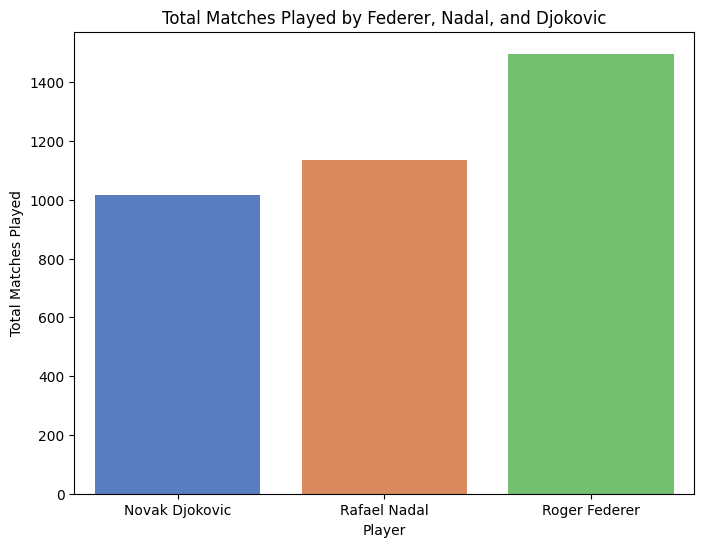

,Player,Total Matches
0,Novak Djokovic,1018
1,Rafael Nadal,1135
2,Roger Federer,1497


In [19]:
# Define the GOAT players
goats = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']

# Count matches where each GOAT was the winner
winner_counts = atp_goats[atp_goats['winner_name'].isin(goats)].groupby('winner_name').size()

# Count matches where each GOAT was the loser
loser_counts = atp_goats[atp_goats['loser_name'].isin(goats)].groupby('loser_name').size()

# Combine the two counts to get the total matches played
total_matches = winner_counts.add(loser_counts, fill_value=0).reset_index()
total_matches.columns = ['Player', 'Total Matches']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Total Matches', data=total_matches, hue='Player', palette='muted', legend=False)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Total Matches Played')
plt.title('Total Matches Played by Federer, Nadal, and Djokovic')

# Show the plot
plt.show()

# Display the total matches played by each player
total_matches

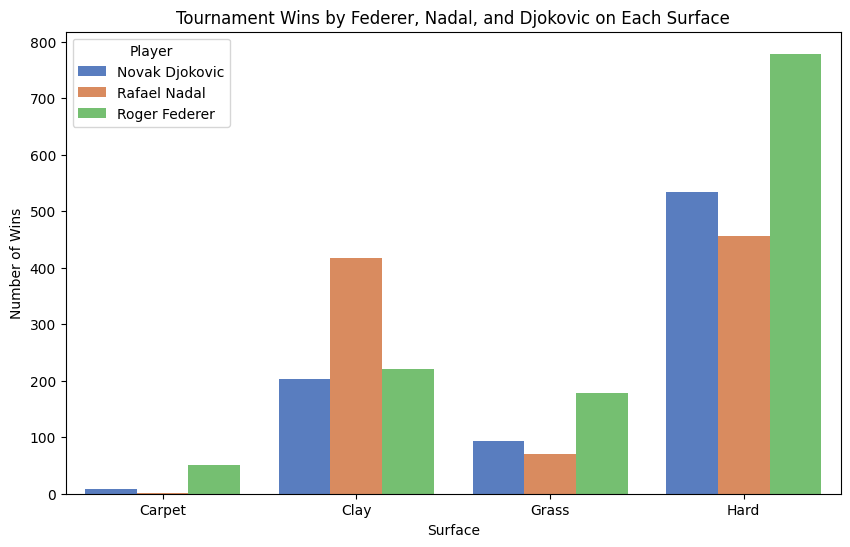

In [20]:
# Filter only the matches where one of the GOATs won
goat_wins = atp_goats[atp_goats['winner_name'].isin(goats)]

# Count wins by surface and player
surface_wins = goat_wins.groupby(['surface', 'winner_name']).size().reset_index(name='Wins')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='surface', y='Wins', hue='winner_name', data=surface_wins, palette='muted')

# Add labels and title
plt.xlabel('Surface')
plt.ylabel('Number of Wins')
plt.title('Tournament Wins by Federer, Nadal, and Djokovic on Each Surface')
plt.legend(title='Player')

# Show the plot
plt.show()

### Win Ratio in Slams

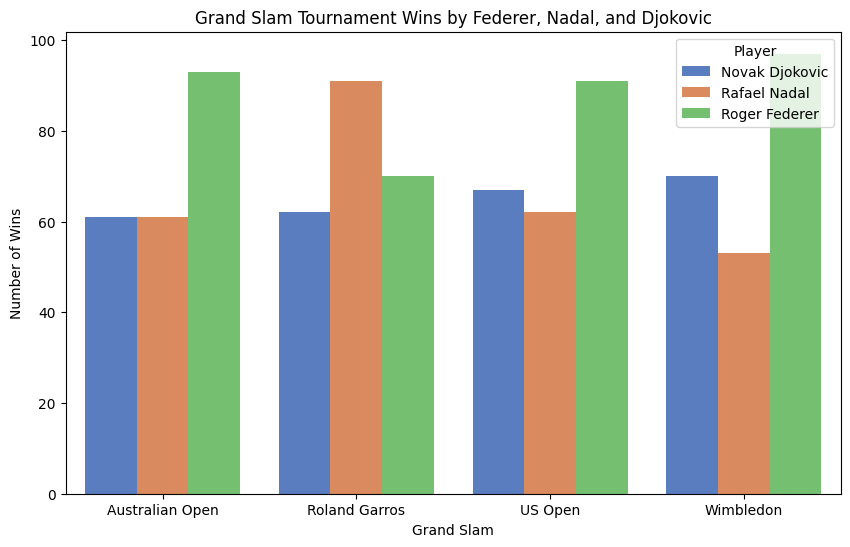

In [21]:
# Define Grand Slam tournaments
grand_slam_names = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open']

# Filter for Grand Slam wins only
grand_slam_wins = atp_goats[(atp_goats['winner_name'].isin(goats)) & 
                             (atp_goats['tourney_name'].isin(grand_slam_names))]

# Count wins by tournament and player
gs_wins = grand_slam_wins.groupby(['tourney_name', 'winner_name']).size().reset_index(name='Wins')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='tourney_name', y='Wins', hue='winner_name', data=gs_wins, palette='muted')

# Add labels and title
plt.xlabel('Grand Slam')
plt.ylabel('Number of Wins')
plt.title('Grand Slam Tournament Wins by Federer, Nadal, and Djokovic')
plt.legend(title='Player')

# Show the plot
plt.show()

## Winnning frequency over time

### On tour in general

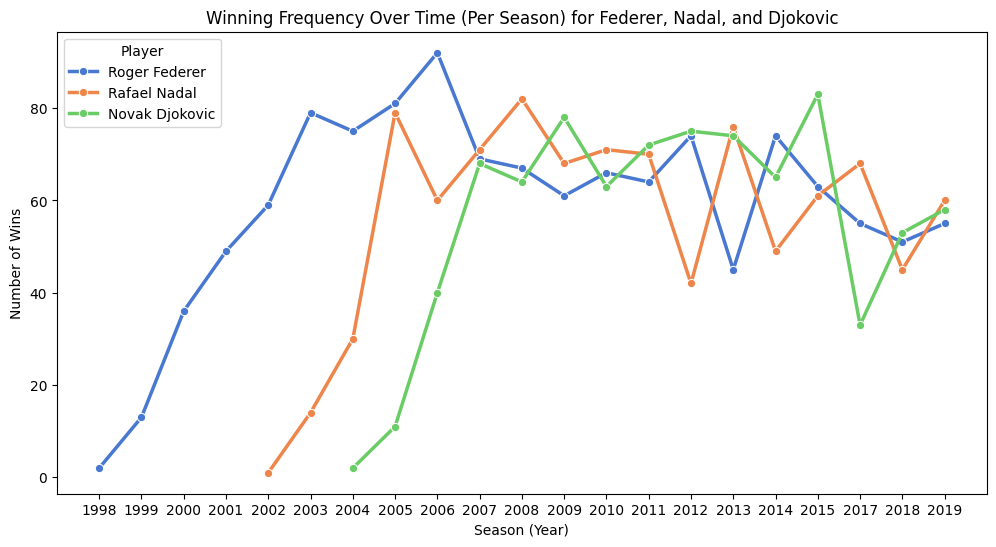

In [24]:
# Filter for wins by GOATs
goat_wins = atp_goats[atp_goats['winner_name'].isin(goats)]

# Count wins per year and player
wins_per_year = goat_wins.groupby(['year', 'winner_name']).size().reset_index(name='Wins')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wins', hue='winner_name', data=wins_per_year, marker='o', linewidth=2.5, palette='muted')

# Labels and title
plt.xlabel('Season (Year)')
plt.ylabel('Number of Wins')
plt.title('Winning Frequency Over Time (Per Season) for Federer, Nadal, and Djokovic')
plt.legend(title='Player')

# Show the plot
plt.show()

### In Grand Slams

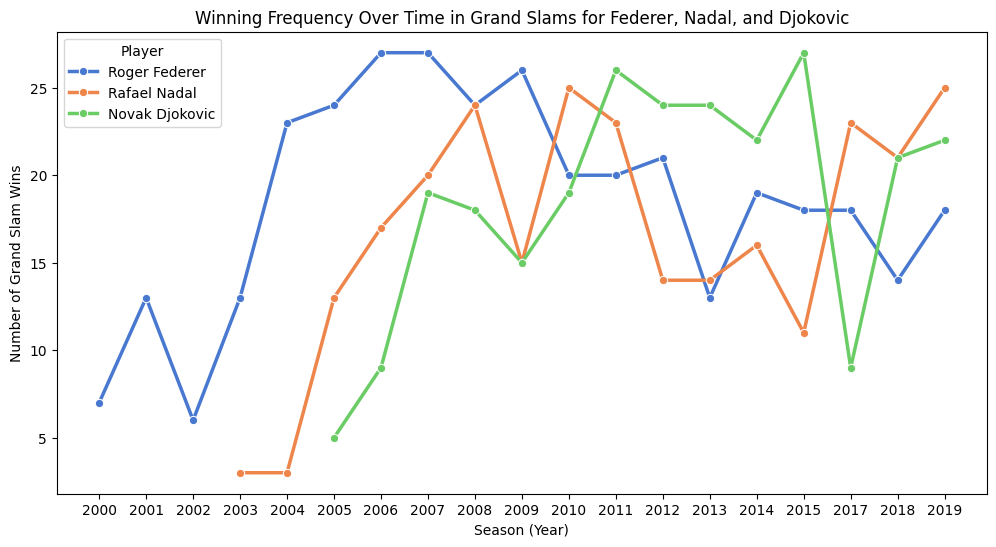

In [25]:
# Filter for Grand Slam wins by GOATs
grand_slam_wins = atp_goats[(atp_goats['winner_name'].isin(goats)) & (atp_goats['tourney_level'] == 'G')]

# Count wins per year and player
slam_wins_per_year = grand_slam_wins.groupby(['year', 'winner_name']).size().reset_index(name='Wins')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wins', hue='winner_name', data=slam_wins_per_year, marker='o', linewidth=2.5, palette='muted')

# Labels and title
plt.xlabel('Season (Year)')
plt.ylabel('Number of Grand Slam Wins')
plt.title('Winning Frequency Over Time in Grand Slams for Federer, Nadal, and Djokovic')
plt.legend(title='Player')

# Show the plot
plt.show()

## Fifth Set Performance

In the world of professional tennis, few challenges test a player’s skill, endurance, and mental fortitude quite like a five-set match. These marathon battles, often lasting 4 to 5 hours or more, push players to their absolute limits, both physically and psychologically. Unlike shorter matches, five-setters demand not only peak athletic performance but also incredible resilience, strategic adaptability, and the ability to handle pressure in the most critical moments.

For this reason, five-set matches are often seen as the ultimate measure of greatness. The ability to consistently win these grueling encounters separates the best from the rest, highlighting who truly thrives under the toughest conditions. When evaluating the GOAT (Greatest of All Time) in tennis, examining performance in five-set matches offers valuable insight into a player’s dominance, clutch factor, and legacy on the biggest stages of the sport.

**Think to measure win ratio not just COUNT !!!**

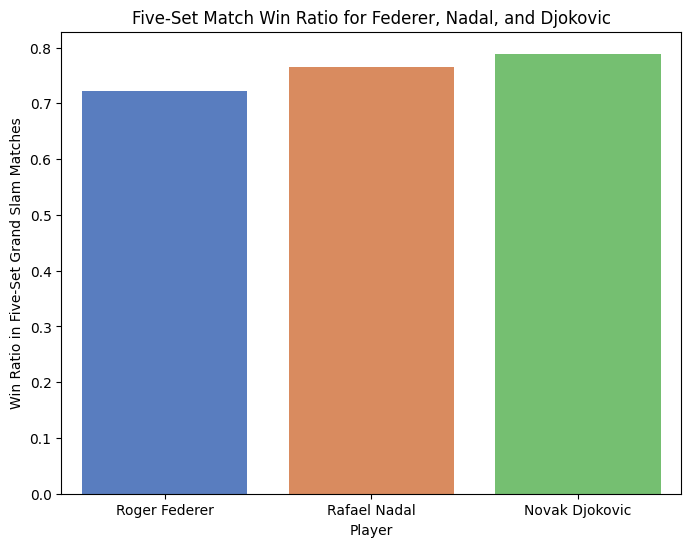

In [26]:
# Filter Grand Slam matches (tourney_level = 'G')
grand_slam_matches = atp_goats[atp_goats['tourney_level'] == 'G']

# Identify five-set matches (assuming score column format allows detection)
five_set_matches = grand_slam_matches[grand_slam_matches['score'].str.count('-') >= 4]

# Calculate total five-set matches and wins for each GOAT
goats = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
win_ratios = {}

for goat in goats:
    total_five_set_matches = len(five_set_matches[(five_set_matches['winner_name'] == goat) | 
                                                  (five_set_matches['loser_name'] == goat)])
    five_set_wins = len(five_set_matches[five_set_matches['winner_name'] == goat])
    
    if total_five_set_matches > 0:
        win_ratios[goat] = five_set_wins / total_five_set_matches
    else:
        win_ratios[goat] = 0

# Convert to DataFrame
df = pd.DataFrame(list(win_ratios.items()), columns=['Player', 'Win Ratio'])

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Win Ratio', data=df, hue='Player', palette='muted', legend=False)

# Labels and title
plt.xlabel('Player')
plt.ylabel('Win Ratio in Five-Set Grand Slam Matches')
plt.title('Five-Set Match Win Ratio for Federer, Nadal, and Djokovic')

# Show plot
plt.show()